In [16]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, cos, sin
from functools import reduce
import pandas as pd

In [2]:
class KohonenNN(object):
    def __init__(self, N, r=None, init=None):
        self.N = N
        if init is None and r is not None:
            self.r = r * np.random.rand()
            self.w = self.r * np.array(list(map(lambda theta: (cos(2 * pi * theta) + 0.5, sin(2 * pi * theta) + 0.5),
                                                np.linspace(0, 2 * pi, N))))
        elif init is not None:
            assert r is None
            self.w = init
        else:
            self.r = np.random.rand()  # I assume r == 1.
            self.w = self.r * np.array(list(map(lambda theta: (cos(2 * pi * theta) + 0.5, sin(2 * pi * theta) + 0.5),
                                                np.linspace(0, 2 * pi, N))))

    def optimize(self, C, d, eta, Nk, sigma):
        for k in range(Nk):
            sigma -= (0.3 * self.N - 0.001 * self.N) / Nk
            for j in np.random.permutation(int(self.N / 2)):
                r_min = np.argmin(np.linalg.norm(self.w - C[j], axis=1))
                for i in range(self.N):
                    self.w[i] += eta * d(i, r_min, sigma) * (C[j] - self.w[i])
        return self.w



In [3]:
def plot_solution(cities, sol):
    plt.figure('Traveling Salesman Problem')
    plt.plot(cities[:, 0], cities[:, 1], 'b*')
    plt.plot(sol[:, 0], sol[:, 1], '-rx')
    plt.title('Traveling Salesman Problem')
    plt.grid()
    plt.show()


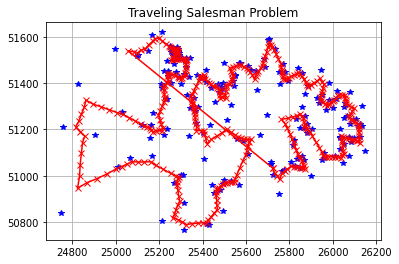

In [15]:
def main():
    # Definition of the problem's parameters
    N = 194*2
    eta = 0.2
    df = pd.read_csv('Cities.csv', header=None, names=['L'])
    C = np.zeros((len(df),2))
    for i in range(len(df)):
      C[i,0] = float(df['L'][i].split(' ')[1])
      C[i][1] = float(df['L'][i].split(' ')[2])

    Nk = 100
    sigma = 0.3 * N
    dist = lambda r, r_min, s: np.exp(-(np.abs(r - r_min)**2) / (2 * s**2))

    KohNN = KohonenNN(N, r=1.0)
    KohNN.optimize(C, dist, eta, Nk, sigma)
    sol = np.vstack((KohNN.w, KohNN.w[0, :]))
    plot_solution(C, sol)


if __name__ == '__main__':
    main()